In [1]:
%conda install pytorch torchvision torchaudio -c pytorch-nightly

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.14.0
  latest version: 25.3.1

Please update conda by running

    $ conda update -n base -c conda-forge conda



## Package Plan ##

  environment location: /Users/kimwash/miniforge3/envs/waste-classifier

  added / updated specs:
    - pytorch
    - torchaudio
    - torchvision


The following NEW packages will be INSTALLED:

  aom                conda-forge/osx-arm64::aom-3.9.1-h7bae524_0
  dav1d              conda-forge/osx-arm64::dav1d-1.2.1-hb547adb_0
  filelock           conda-forge/noarch::filelock-3.18.0-pyhd8ed1ab_0
  freetype           conda-forge/osx-arm64::freetype-2.13.3-h1d14073_0
  fsspec             conda-forge/noarch::fsspec-2025.3.2-pyhd8ed1ab_0
  giflib             conda-forge/osx-arm64::giflib-5.2.2-h93a5062_0
  gmp                conda-forge/osx-arm64::gmp-6.3.0-h7bae524_2
  gmpy2              conda-forge/osx-arm64::gmpy2-2.1.5-py310h805dbd7_3
  icu                co

In [2]:
%pip install onnx onnxruntime scikit-learn matplotlib pandas tqdm

  Using cached protobuf-6.30.2-cp39-abi3-macosx_10_9_universal2.whl.metadata (593 bytes)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 11.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.6/33.6 MB 11.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 10.9 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 11.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 11.5 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 11.1 MB/s eta 0:00:00a 0:00:01
Using cached protobuf-6.30.2-cp39-abi3-macosx_10_9_universal2.whl (417 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.4/22.4 MB 11.0 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install opencv-python pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 11.5 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
import torch
import torchvision
from torchvision import datasets, transforms, models
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import os
from tqdm import tqdm
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [5]:

# M1 GPU 가속 여부 확인
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
print("Using device:", device)


Using device: mps


In [6]:
data_dir = "./dataset"
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])


In [7]:
train_data = datasets.ImageFolder(os.path.join(data_dir, "train"), transform=transform)
val_data = datasets.ImageFolder(os.path.join(data_dir, "val"), transform=transform)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
val_loader = DataLoader(val_data, batch_size=32)

class_names = train_data.classes
print("Classes:", class_names)


Classes: ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']


In [8]:

model = models.mobilenet_v2(pretrained=True)
model.classifier[1] = nn.Linear(model.last_channel, len(class_names))
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0005)

EPOCHS = 5
train_loss_history = []

for epoch in range(EPOCHS):
    model.train()
    running_loss = 0.0
    for inputs, labels in tqdm(train_loader):
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    avg_loss = running_loss / len(train_loader)
    train_loss_history.append(avg_loss)
    print(f"[{epoch+1}] Loss: {avg_loss:.4f}")



/Users/kimwash/miniforge3/envs/waste-classifier/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/kimwash/miniforge3/envs/waste-classifier/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /Users/kimwash/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth
100%|██████████| 13.6M/13.6M [00:01<00:00, 11.1MB/s]
100%|██████████| 79/79 [00:59<00:00,  1.33it/s]


[1] Loss: 0.6080


100%|██████████| 79/79 [00:44<00:00,  1.78it/s]


[2] Loss: 0.2724


100%|██████████| 79/79 [00:45<00:00,  1.75it/s]


[3] Loss: 0.2757


100%|██████████| 79/79 [00:44<00:00,  1.78it/s]


[4] Loss: 0.1686


100%|██████████| 79/79 [00:44<00:00,  1.79it/s]

[5] Loss: 0.0932


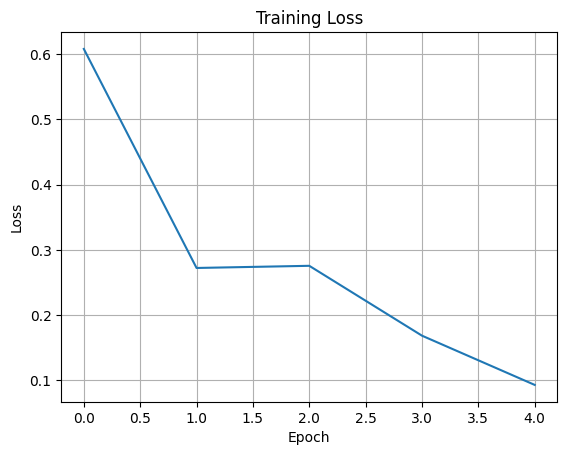

In [9]:
## ✅ 5. Loss 시각화
plt.plot(train_loss_history)
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid()
plt.show()

In [20]:
# 전처리 방식 (학습에 사용한 것과 동일)
from PIL import Image


preprocess = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])


# 테스트할 이미지 경로
image_path = "dataset/val/plastic/3.jpeg"
image = Image.open(image_path).convert("RGB")
input_tensor = preprocess(image).unsqueeze(0).to(device)

# 예측
model.eval()
with torch.no_grad():
    output = model(input_tensor)
    pred = torch.argmax(output, dim=1).item()
    print(f"예측 결과: {class_names[pred]}")

예측 결과: plastic


In [21]:

## ✅ 4. ONNX Export
dummy_input = torch.randn(1, 3, 224, 224).to(device)
torch.onnx.export(
    model,
    dummy_input,
    "waste_classifier.onnx",
    input_names=["input"],
    output_names=["output"],
    dynamic_axes={"input": {0: "batch_size"}, "output": {0: "batch_size"}},
    opset_version=11
)

print("ONNX 모델이 waste_classifier.onnx 로 저장되었습니다.")

ONNX 모델이 waste_classifier.onnx 로 저장되었습니다.


In [1]:
from onnxruntime.tools import convert_onnx_models_to_ort

convert_onnx_models_to_ort.convert(
    model_input_paths=["waste_classifier.onnx"],
    model_output_path="waste_classifier.ort"
)


AttributeError: module 'onnxruntime.tools.convert_onnx_models_to_ort' has no attribute 'convert'